In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import scipy.stats as st

In [2]:
path = 'EmployeeAttrition.csv'
df = pd.read_csv(path)
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [26]:
# Create separate dfs for each designation

des1_df = df.loc[df['Designation']==1,:]
des2_df = df.loc[df['Designation']==2,:]
des3_df = df.loc[df['Designation']==3,:]
des4_df = df.loc[df['Designation']==4,:]
des5_df = df.loc[df['Designation']==5,:]
des1_df.head()

des1_df.to_csv('EA_des1_df')
des2_df.to_csv('EA_des2_df')
des3_df.to_csv('EA_des3_df')
des4_df.to_csv('EA_des4_df')
des5_df.to_csv('EA_des5_df')

In [4]:
# group dfs by quartley rating and get mean total business value
# eg. level 4 should make x amount to receive high rating
pd.options.display.float_format = '{:.2f}'.format
d1_gr = des1_df.groupby('Quarterly Rating')['Total Business Value'].mean()
d2_gr = des2_df.groupby('Quarterly Rating')['Total Business Value'].mean()
d3_gr = des3_df.groupby('Quarterly Rating')['Total Business Value'].mean()
d4_gr = des4_df.groupby('Quarterly Rating')['Total Business Value'].mean()
d5_gr = des5_df.groupby('Quarterly Rating')['Total Business Value'].mean()
print(d1_gr)


Quarterly Rating
1     48940.26
2    309147.31
3    583645.68
4   1265602.71
Name: Total Business Value, dtype: float64


In [ ]:
all_df = df.groupby(['Designation','Quarterly Rating'])['Total Business Value'].mean().unstack('Quarterly Rating')
all_df

In [ ]:

rating = range(1,5,1)
fig_2 = all_df.plot.bar(x='Designation', rot=20, figsize = (10,5), width = 0.5)
plt.show()


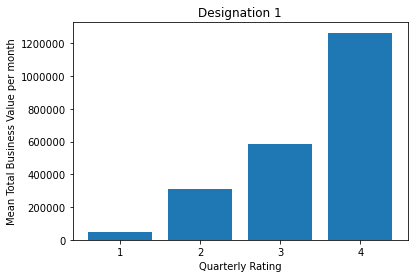

In [5]:
# pd.options.display.float_format = '{:.2f}'.format
# Why won't this display the correct values on y axis? They are printed correctly above.

# Fig_d1 = d1_gr.plot(kind='bar', facecolor='red',title='Total Business Value by Quarterly Rating for Designation 1')
# Fig_d1.set_xlabel('Quarterly Rating')
# Fig_d1.set_ylabel('Mean Total Business Value per month')

# plt.ticklabel_format(style='plain')
# xticks=(d1_gr.index)

rating = range(1,5,1)
plt.bar(rating,d1_gr)
plt.xticks(d1_gr.index)
plt.ticklabel_format(style='plain')
plt.title('Designation 1')
plt.ylabel('Mean Total Business Value per month')
plt.xlabel('Quarterly Rating')
plt.show()


In [ ]:
fig, ax = plt.subplots()
width = 0.35
d1 = ax.bar(rating, d1_gr, width, label='D1')
d2 = ax.bar(rating, d2_gr, width,label='D2')
d3 = ax.bar(rating, d3_gr, width,label='D3')
d4 = ax.bar(rating, d4_gr, width,label='D4')
d5 = ax.bar(rating, d1_gr, width,label='D5')
ax.set_ylabel('Business Value per month')
ax.set_title('Business Value & Rating per Designation')
ax.set_xticks(d1_gr.index)
ax.legend()
fig.tight_layout()
# plt.show()

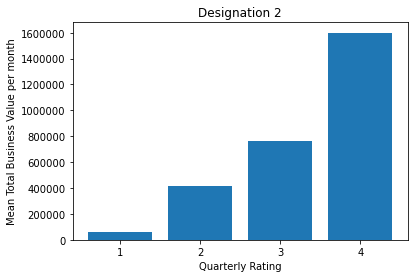

In [7]:
rating = range(1,5,1)
plt.bar(rating,d2_gr)
plt.xticks(d2_gr.index)
plt.ticklabel_format(style='plain')
plt.title('Designation 2')
plt.ylabel('Mean Total Business Value per month')
plt.xlabel('Quarterly Rating')
plt.show()

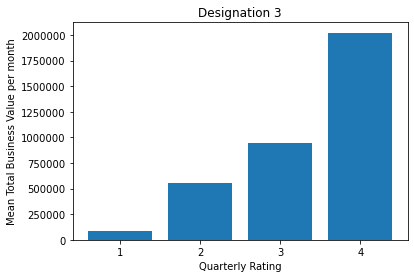

In [8]:
rating = range(1,5,1)
plt.bar(rating,d3_gr)
plt.xticks(d3_gr.index)
plt.ticklabel_format(style='plain')
plt.title('Designation 3')
plt.ylabel('Mean Total Business Value per month')
plt.xlabel('Quarterly Rating')

plt.show()

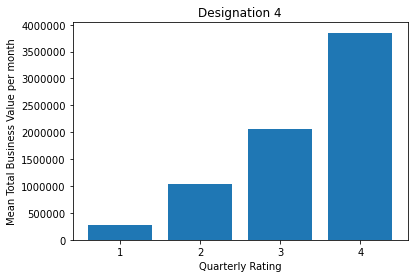

In [9]:
rating = range(1,5,1)
plt.bar(rating,d4_gr)
plt.xticks(d4_gr.index)
plt.ticklabel_format(style='plain')
plt.title('Designation 4')
plt.ylabel('Mean Total Business Value per month')
plt.xlabel('Quarterly Rating')
plt.show()

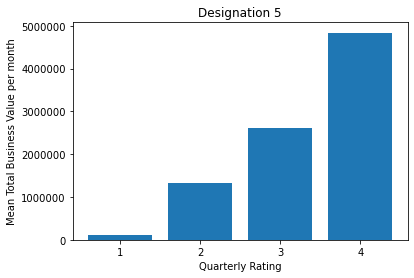

In [10]:
rating = range(1,5,1)
plt.bar(rating,d5_gr)
plt.xticks(d5_gr.index)
plt.ticklabel_format(style='plain')
plt.title('Designation 5')
plt.ylabel('Mean Total Business Value per month')
plt.xlabel('Quarterly Rating')
plt.show()

In [ ]:
# Findings: higher business value required for higher designations. Consistent (fair)
# 

In [11]:
# get salary information per designation
# one row per employee, show Salary mean for each employee

ind_des1_df = des1_df.groupby('Emp_ID')
d1_salary = ind_des1_df['Salary'].mean()

ind_des2_df = des2_df.groupby('Emp_ID')
d2_salary = ind_des2_df['Salary'].mean()

ind_des3_df = des3_df.groupby('Emp_ID')
d3_salary = ind_des3_df['Salary'].mean()

ind_des4_df = des4_df.groupby('Emp_ID')
d4_salary = ind_des4_df['Salary'].mean()

ind_des5_df = des5_df.groupby('Emp_ID')
d5_salary = ind_des5_df['Salary'].mean()


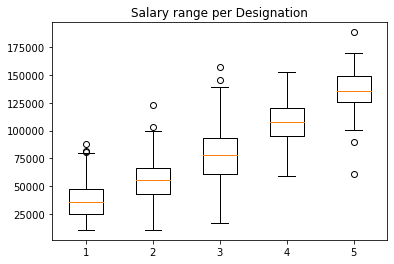

In [30]:
data = [d1_salary, d2_salary, d3_salary, d4_salary, d5_salary]
fig2,ax1 = plt.subplots()
ax1.set_title('Salary range per Designation')
ax1.boxplot(data)
plt.savefig('../02_Presentation/Salary_Designation.png')
plt.show()

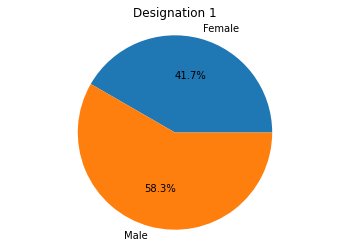

In [13]:
# gender % per designation pie charts

s_d1 = des1_df.sort_values(["MMM-YY",'Emp_ID'], ascending = False)
s_d1 = des1_df.drop_duplicates(subset = 'Emp_ID', keep = 'first').reset_index(drop = True)

s_d2 = des2_df.sort_values(["MMM-YY",'Emp_ID'], ascending = False)
s_d2 = des2_df.drop_duplicates(subset = 'Emp_ID', keep = 'first').reset_index(drop = True)

s_d3 = des3_df.sort_values(["MMM-YY",'Emp_ID'], ascending = False)
s_d3 = des3_df.drop_duplicates(subset = 'Emp_ID', keep = 'first').reset_index(drop = True)

s_d4 = des4_df.sort_values(["MMM-YY",'Emp_ID'], ascending = False)
s_d4 = des4_df.drop_duplicates(subset = 'Emp_ID', keep = 'first').reset_index(drop = True)

s_d5 = des5_df.sort_values(["MMM-YY",'Emp_ID'], ascending = False)
s_d5 = des5_df.drop_duplicates(subset = 'Emp_ID', keep = 'first').reset_index(drop = True)

gen_d1 = s_d1.groupby('Gender').count()
gen_d2 = s_d2.groupby('Gender').count()
gen_d3 = s_d3.groupby('Gender').count()
gen_d4 = s_d4.groupby('Gender').count()
gen_d5 = s_d5.groupby('Gender').count()


#plot d1 pie chart 
labels = ['Female','Male']

# pie_1 = gen_d1.plot(kind='pie', y='Gender')
plt.pie(gen_d1['Emp_ID'], labels=labels, autopct="%1.1f%%")

plt.axis('equal')
plt.title('Designation 1')
plt.show()


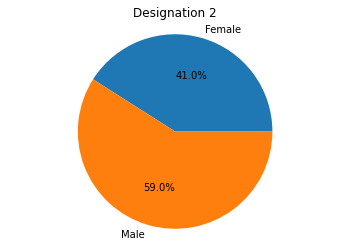

In [14]:
plt.pie(gen_d2['Emp_ID'], labels=labels, autopct="%1.1f%%")
plt.axis('equal')
plt.title('Designation 2')
plt.show()


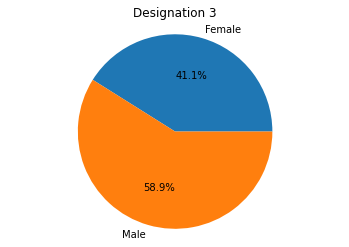

In [15]:
plt.pie(gen_d3['Emp_ID'], labels=labels, autopct="%1.1f%%")
plt.axis('equal')
plt.title('Designation 3')
plt.show()


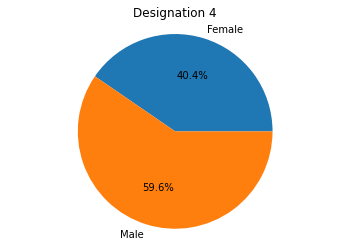

In [16]:
plt.pie(gen_d4['Emp_ID'], labels=labels, autopct="%1.1f%%")
plt.axis('equal')
plt.title('Designation 4')
plt.show()


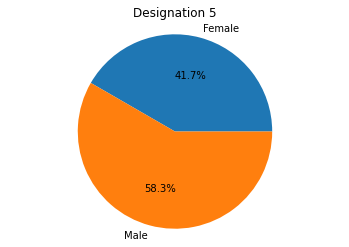

In [17]:
plt.pie(gen_d5['Emp_ID'],  labels=labels, autopct="%1.1f%%")
plt.axis('equal')
plt.title('Designation 5')
plt.show()


In [ ]:
# Findings: Gender breakdown is almost identical at all designations

Gender
Female    37046
Male      35808
Name: Salary, dtype: int64
Gender
Female   37993.66
Male     36393.64
Name: Salary, dtype: float64


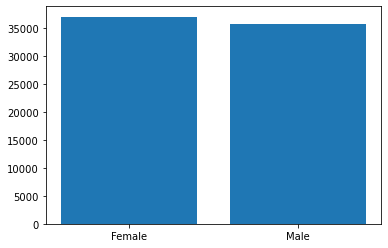

In [19]:
# Salary comparision by gender
genSal_d1 = s_d1.groupby('Gender')
print(genSal_d1['Salary'].median())
print(genSal_d1['Salary'].mean())
x = ['Female','Male']
fig, ax
plt.bar(x, genSal_d1['Salary'].median())
# plt.bar(x, genSal_d1['Salary'].mean())
plt.show()

Gender
Female    55815
Male      55441
Name: Salary, dtype: int64
Gender
Female   55319.91
Male     55388.29
Name: Salary, dtype: float64


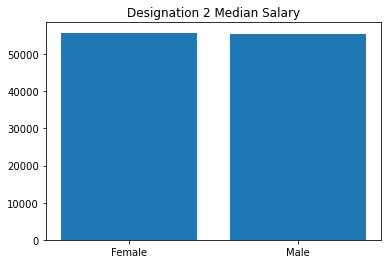

In [20]:
genSal_d2 = s_d2.groupby('Gender')
print(genSal_d2['Salary'].median())
print(genSal_d2['Salary'].mean())
x = ['Female','Male']
fig, ax
plt.bar(x, genSal_d2['Salary'].median())
plt.title('Designation 2 Median Salary')
plt.show()

Gender
Female    79700
Male      76525
Name: Salary, dtype: int64
Gender
Female   79681.39
Male     77192.90
Name: Salary, dtype: float64


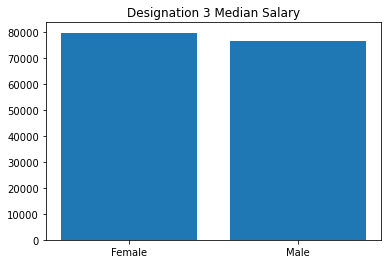

In [21]:
genSal_d3 = s_d3.groupby('Gender')
print(genSal_d3['Salary'].median())
print(genSal_d3['Salary'].mean())
x = ['Female','Male']
fig, ax
plt.bar(x, genSal_d3['Salary'].median())
plt.title('Designation 3 Median Salary')
plt.show()

Gender
Female    105686
Male      112217
Name: Salary, dtype: int64
Gender
Female   105837.86
Male     110855.24
Name: Salary, dtype: float64


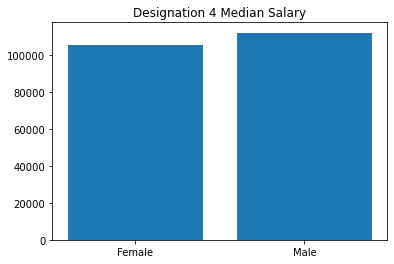

In [22]:
genSal_d4 = s_d4.groupby('Gender')
print(genSal_d4['Salary'].median())
print(genSal_d4['Salary'].mean())
x = ['Female','Male']
fig, ax
plt.bar(x, genSal_d4['Salary'].median())
plt.title('Designation 4 Median Salary')
plt.show()

Gender
Female   127824.00
Male     138094.50
Name: Salary, dtype: float64
Gender
Female   121381.20
Male     142762.00
Name: Salary, dtype: float64


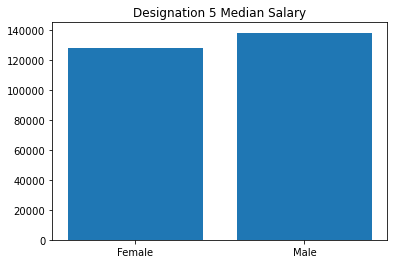

In [23]:
genSal_d5 = s_d5.groupby('Gender')
print(genSal_d5['Salary'].median())
print(genSal_d5['Salary'].mean())
x = ['Female','Male']
fig, ax
plt.bar(x, genSal_d5['Salary'].median())
plt.title('Designation 5 Median Salary')
plt.show()

In [ ]:
# Findings: Salary similar for both genders across all levels. **Calculate %

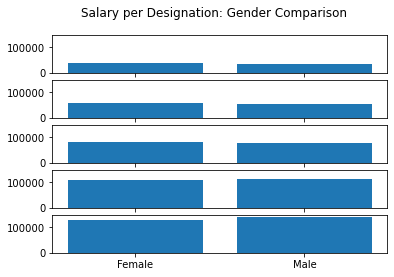

In [24]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharey=True)
fig.suptitle('Salary per Designation: Gender Comparison')
ax1.bar(x, genSal_d1['Salary'].median())
# ax1.title('Designation 1 Median Salary')

ax2.bar(x, genSal_d2['Salary'].median())
# ax2.title('Designation 2 Median Salary')

ax3.bar(x, genSal_d3['Salary'].median())
# ax3.title('Designation 3 Median Salary')

ax4.bar(x, genSal_d4['Salary'].median())
# ax4.title('Designation 4 Median Salary')

ax5.bar(x, genSal_d5['Salary'].median())
# ax5.title('Designation 5 Median Salary')
plt.show()
# not useful, use individual plots above

In [ ]:
# ***FAIL CODE***
# # Make figure and axes
# fig, axs = plt.subplots(2, 2)

# # A standard pie plot
# axs[0, 0].pie(gen_d1, labels=labels, autopct='%1.1f%%')

# # Shift the second slice using explode
# axs[0, 1].pie(gen_d2, labels=labels, autopct='%.0f%%')

# axs[1, 0].pie(gen_d2, labels=labels, autopct='%.0f%%')

# # Adapt radius and text size for a smaller pie
# patches, texts, autotexts = axs[1, 0].pie(fracs, labels=labels,
#                                           autopct='%.0f%%',
#                                           textprops={'size': 'smaller'},
#                                           shadow=True, radius=0.5)
# # Make percent texts even smaller
# plt.setp(autotexts, size='x-small')
# autotexts[0].set_color('white')

# # Use a smaller explode and turn of the shadow for better visibility
# patches, texts, autotexts = axs[1, 1].pie(fracs, labels=labels,
#                                           autopct='%.0f%%',
#                                           textprops={'size': 'smaller'},
#                                           shadow=False, radius=0.5,
#                                           explode=(0, 0.05, 0, 0))
# plt.setp(autotexts, size='x-small')
# autotexts[0].set_color('white')

# plt.show()